In [1]:
import ee

In [3]:
ee.Initialize()

In [4]:
import geemap

In [7]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [2]:
ee.Authenticate()

Enter verification code: 4/1AX4XfWgUfx3eQJi7dYsTOgvO1xkOWeaHlCwsXWEWt4xaAbVZBMvs8ZUpAaY

Successfully saved authorization token.


In [5]:
center_lat = 9.0
center_lon = 7.4
zoomlevel=6

# initialize our map
myFirstMap = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
myFirstMap.addLayerControl()
myFirstMap

Map(center=[9.0, 7.4], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [6]:
dmsp92id = 
dmsp92 = ee.Image("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101992")

# initialize another map add this image as a layer to our map object
# and call the layer: "DMSP NTL 1992"
Map2 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
Map2.addLayer(dmsp92, name='DMSP NTL 1992')

Map2.addLayerControl()
Map2

Map(center=[9.0, 7.4], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [7]:
Map3 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
Map3.addLayer(dmsp92, name='DMSP NTL 1992', opacity=0.75)

Map3.addLayerControl()
Map3

Map(center=[9.0, 7.4], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [21]:
viirs2019_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2019-12-01","2019-12-31").select('avg_rad').median()
viirs2020_6 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2020-12-01","2020-12-31").select('avg_rad').median()


# initialize our map
map1 = geemap.Map()
map1.add_basemap('SATELLITE')

map1.addLayerControl()

dmsp1996_tile = geemap.ee_tile_layer(viirs2019_12, {}, 'DMSP-OLS 1996', opacity=0.75)
dmsp2010_tile = geemap.ee_tile_layer(viirs2020_6, {}, 'DMSP-OLS 2010', opacity=0.75)

# create split map
map1.split_map(left_layer=dmsp1996_tile, right_layer=dmsp2010_tile)
map1

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [28]:
aoi = ee.Geometry.Point([12.963, 77.5842]).buffer(200000)

viirs2019_12_clipped = viirs2019_12.clip(aoi)

map2 = geemap.Map(center=[12.963, 77.5842],zoom=10)
map2.add_basemap('SATELLITE')
map2.addLayer(viirs2019_12, {}, "VIIRS-DNB- Greater LA Dec 2019")
map2.addLayerControl()
map2

Map(center=[12.963, 77.5842], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
lat = 12.963
lon = 77.5842

# initialize our map
map1 = geemap.Map(center=[lat,lon],zoom=9)
map1.add_basemap('SATELLITE')
map1.addLayer(viirs2019_12_clipped,{},'viiirs',opacity=0.75)
map1.addLayerControl()
map1

Map(center=[12.963, 77.5842], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

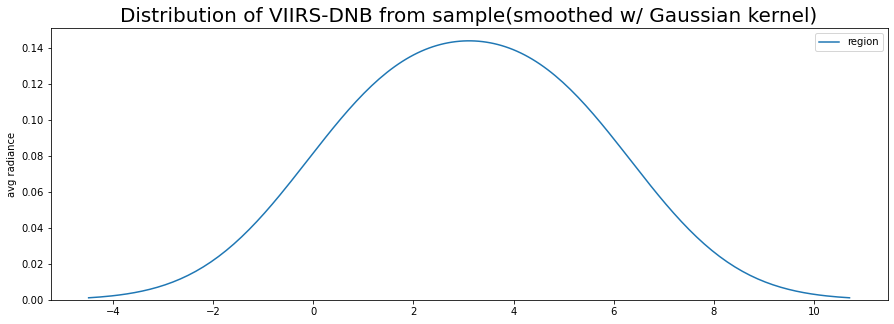

In [170]:
# aoi = ee.Geometry.Point([lon,lat]).buffer(25000)

arr = geemap.ee_to_numpy(viirs2019_12, region=tls)
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(arr.flatten(), label='region',legend=True, ax=ax)
# ax.axvline(3, color='indianred', label='suggested threshold')
plt.legend(fontsize=20)
plt.title('Distribution of VIIRS-DNB from sample(smoothed w/ Gaussian kernel)', fontsize=20);
plt.ylabel('avg radiance')
plt.legend();

In [61]:
arr

array([[[4.05628967]],

       [[1.18017149]]])

In [143]:
viirs2019_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2020-02-01","2020-02-29").select('avg_rad').median()
viirs2020_6 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2020-05-01","2020-05-31").select('avg_rad').median()

viirs2019_12_mask = viirs2019_12.gte(50)
viirs2020_mask = viirs2020_6.gte(50)

map2 = geemap.Map(center=[lat,lon],zoom=10.5)
map2.add_basemap('SATELLITE')

# we'll mask the image with itself to keep the visualization clean
dmsp1996_tile = geemap.ee_tile_layer(viirs2019_12_mask, {}, 'DMSP-OLS 1996', opacity=0.6)
dmsp2010_tile = geemap.ee_tile_layer(viirs2020_mask, {}, 'DMSP-OLS 2010', opacity=0.6)

# create split map
map2.split_map(left_layer=dmsp1996_tile, right_layer=dmsp2010_tile)
map2

Map(center=[12.963, 77.5842], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [108]:
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(
    '2020-02-01','2020-05-31')

In [109]:
# sort by image "time_end"
first_img = viirs.sort('system:time_end').first()

# reverse sort so that last=first
last_img = viirs.sort('system:time_end',False).first()

# get rate of change (diff over # months: 73)
viirs_slope = (last_img.select('avg_rad').subtract(first_img.select('avg_rad'))).divide(viirs.size().getInfo())

In [144]:
viirsMap = geemap.Map(center=[lat,lon],zoom=11)
# viirsMap.add_basemap('SATELLITE')

viz_params = {'min':-1,
             'max':1,
             'palette':['1d4877','1b8a5a','f68838','ee3e32']}

# make it opaque so we can see underlying basemap
viirsMap.addLayer(viirs_slope, viz_params, '2014-2020 VIIRS-DNB monthly rate of change',opacity=.75)
viirsMap.addLayerControl()
viirsMap

Map(center=[12.963, 77.5842], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

In [163]:
aoi = ee.Geometry.Point([lon, lat]).buffer(200000);
viirs2019_12_clipped = viirs2019_12.clip(aoi)

map2 = geemap.Map(center=[lat, lon],zoom=10.5)
map2.add_basemap('SATELLITE')
# map2.addLayer(viirs2019_12_clipped, {}, "VIIRS-DNB- Greater LA Dec 2019",opacity=0.75)
map2.addLayerControl()
map2

Map(center=[12.963, 77.5842], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

In [180]:
viirs2017_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2019-05-01","2019-05-31").select('avg_rad').median()

# get the geometry for Timor-Leste from GEE's tagged datasets
tls = ee.FeatureCollection("users/ujavalgandhi/e2e/ne_10m_urban_areas").filter(ee.Filter.eq('system:index', '00000000000000002bf8')).geometry()

# clip our VIIRS image to Timor-Leste
ntl_tls = viirs2017_12.clip(tls)


# initialize our map and center it on Timor-Leste
map1 = geemap.Map()
map1.centerObject(tls, zoom=11)
map1.add_basemap('SATELLITE')
map1.addLayer(ntl_tls, {}, "VIIRS-DNB Dec 2017", opacity=0.5)
map1.addLayerControl()
map1

Map(center=[12.98398896127424, 77.60861545217912], controls=(WidgetControl(options=['position', 'transparent_b…

In [ ]:
{"type":"Polygon","coordinates":[[[77.458145,12.828129],[77.458145,13.100996],[77.773315,13.100996],[77.773315,12.828129],[77.458145,12.828129]]]}

In [181]:
mu = ntl_tls.reduceRegion(reducer=ee.Reducer.mean())
std = ntl_tls.reduceRegion(reducer=ee.Reducer.stdDev())

# we'll cast these to native ee Numbers using the ee.Number constructor
mu = ee.Number(mu.get('avg_rad'))
std = ee.Number(std.get('avg_rad'))

In [183]:
!python --version

Python 3.8.5


In [245]:
import rasterio as rio
import rasterio.plot as rplt
import numpy as np
import matplotlib.pyplot as plt

In [241]:
filepath = "samples/2021-02-07-00_00_2021-02-07-23_59_Sentinel-2_L2A_True_color.tiff"
img = rio.open(filepath)
full = img.read()

In [229]:
img.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1250,
 'height': 636,
 'count': 4,
 'crs': CRS.from_wkt('LOCAL_CS["Popular Visualisation Pseudo Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(45.73991772584915, 0.0, 8604050.012388563,
        0.0, -45.79010656706399, 1472228.8983648082)}

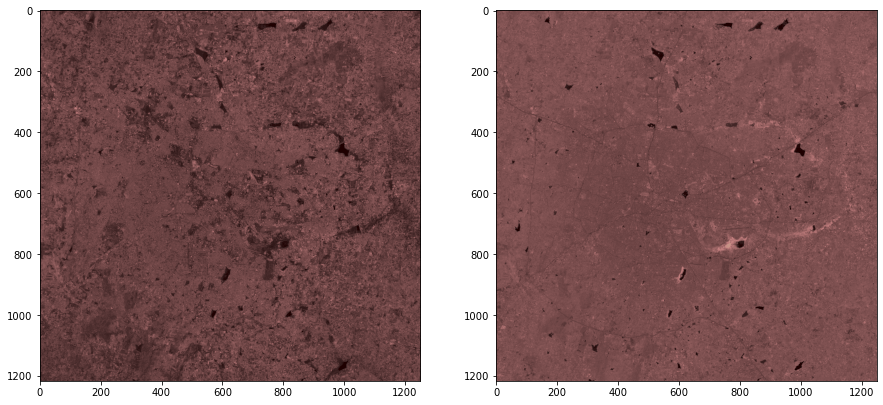

In [271]:
file = f'samples/Feb2020/2020-02-13-00_00_2020-02-13-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
img = rio.open(file)
red = img.read(1).astype('f4')
file = f'samples/Feb2020/2020-02-13-00_00_2020-02-13-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
img = rio.open(file)
nir = img.read(1).astype('f4')

fig = plt.figure(figsize=(15,7.5))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(red, cmap='pink')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(nir, cmap='pink');

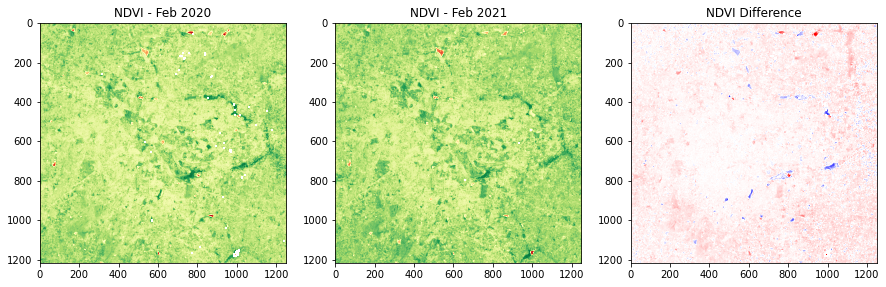

In [367]:
file = f'samples/Feb2021/2021-02-07-00_00_2021-02-07-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
img = rio.open(file)
red2 = img.read(1).astype('f4')
file = f'samples/Feb2021/2021-02-07-00_00_2021-02-07-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
img = rio.open(file)
nir2 = img.read(1).astype('f4')


ndvi = (nir - red)/(nir + red)
ndvi2 = (nir2 - red2)/(nir2 + red2)

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(ndvi, cmap='RdYlGn')
ax1.set_title("NDVI - Feb 2020")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(ndvi2, cmap='RdYlGn')
ax2.set_title("NDVI - Feb 2021")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(ndvi2-ndvi, cmap='bwr', vmin=-1, vmax=1)
ax3.set_title("NDVI Difference");

In [319]:
bangalore

,WARD_NO,WARD_NAME,ZONE,geometry
0,100,Basaveshwara Nagar,West,"POLYGON ((77.53749 12.98794, 77.53788 12.98966..."
1,108,Sriramamandir,West,"POLYGON ((77.54909 12.98440, 77.54913 12.98492..."
2,136,Jagajivanaramnagar,South,"POLYGON ((77.55441 12.95822, 77.55244 12.95757..."
3,043,Nandini Layout,West,"POLYGON ((77.52767 13.01052, 77.52780 13.01068..."
4,074,Shakthi Ganapathi Nagar,South,"POLYGON ((77.52390 12.99797, 77.52777 12.99888..."
...,...,...,...,...
193,057,C.V Raman Nagar,East,"POLYGON ((77.64806 12.98689, 77.64807 12.98689..."
194,085,Kundalahalli,Mahadevapura,"POLYGON ((77.69563 12.98275, 77.69729 12.98246..."
195,084,Hagadur,Mahadevapura,"POLYGON ((77.72767 12.96494, 77.72831 12.96892..."
196,088,Jeevanbhima Nagar,East,"POLYGON ((77.64133 12.97023, 77.64330 12.97030..."


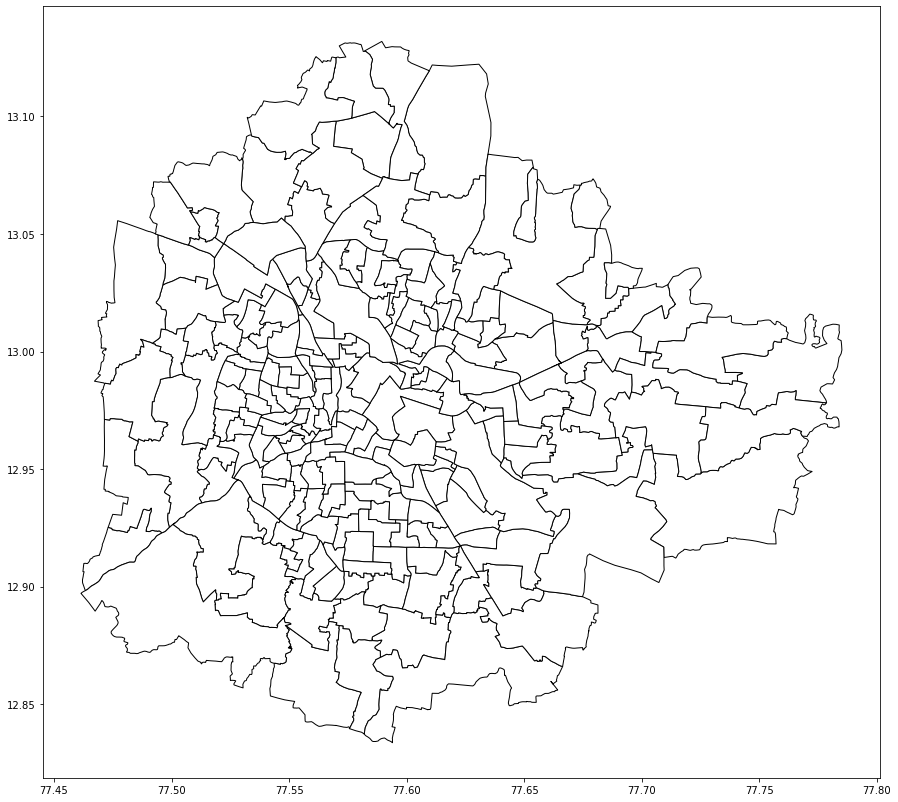

In [316]:
ax = bangalore.plot(figsize=(15,15),color='white', edgecolor='black')

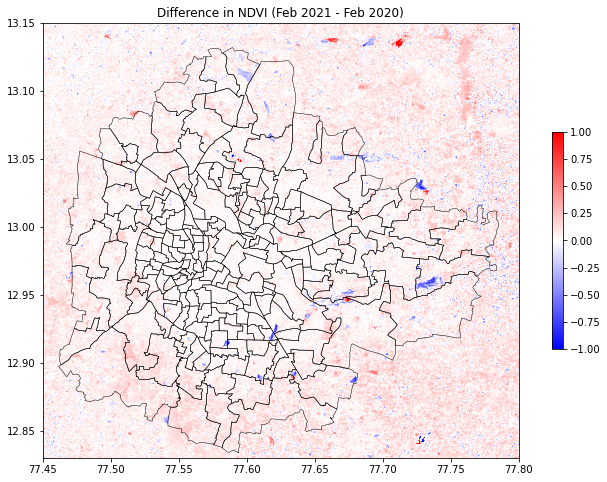

In [350]:
ndvi_diff = ndvi2-ndvi
bangalore = gpd.read_file('data/BBMP_Wards_2011_region.json')

fig, ax = plt.subplots()
bangalore.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 0.5,ax=ax)
plt.sca(ax)
plt.imshow(ndvi_diff, cmap='bwr', extent=(77.45, 77.8, 12.83, 13.15), vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)

plt.title('Difference in NDVI ({} - {})'.format('Feb 2021', 'Feb 2020'));

In [358]:
ndvi_norm = np.nan_to_num(ndvi_diff, nan=0)

In [370]:
np.nan_to_num(ndvi, nan=0).mean(), np.nan_to_num(ndvi2, nan=0).mean()

(0.29400808, 0.2808456)

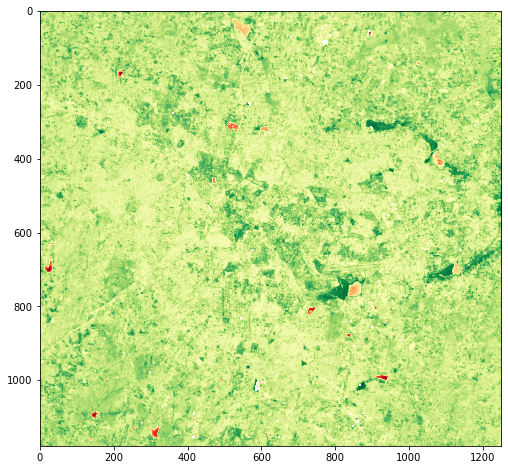

In [380]:
file = f'samples/Feb2019/2019-02-13-00_00_2019-02-13-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
img = rio.open(file)
red2 = img.read(1).astype('f4')
file = f'samples/Feb2019/2019-02-13-00_00_2019-02-13-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
img = rio.open(file)
nir2 = img.read(1).astype('f4')


ndvi = (nir - red)/(nir + red)
ndvi2 = (nir2 - red2)/(nir2 + red2)

plt.imshow(ndvi2, cmap='RdYlGn')

In [381]:
np.nan_to_num(ndvi2, nan=0).mean()

0.2808456

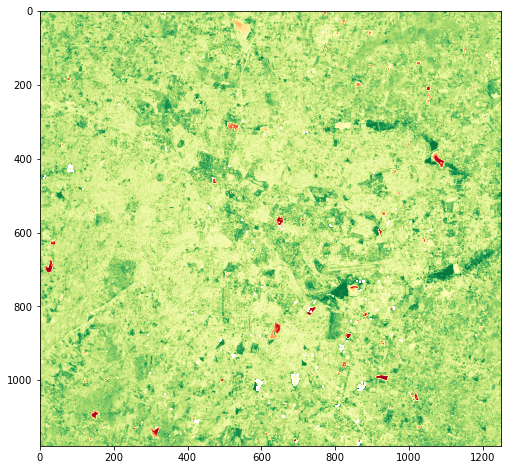

In [376]:
file = f'samples/Feb2018/2018-02-18-00_00_2018-02-18-23_59_Sentinel-2_L2A_B04_(Raw).tiff'
img = rio.open(file)
red2 = img.read(1).astype('f4')
file = f'samples/Feb2018/2018-02-18-00_00_2018-02-18-23_59_Sentinel-2_L2A_B08_(Raw).tiff'
img = rio.open(file)
nir2 = img.read(1).astype('f4')


ndvi = (nir - red)/(nir + red)
ndvi2 = (nir2 - red2)/(nir2 + red2)

plt.imshow(ndvi2, cmap='RdYlGn')

In [377]:
np.nan_to_num(ndvi2, nan=0).mean()

0.30872837

In [373]:
import os

In [386]:
def get_bands(year):
    filepath = f'samples/Feb{year}'
    try:
        for file in os.listdir(filepath): 
            if 'B04' in file:
                img = rio.open(f'{filepath}/{file}')
                red = img.read(1).astype('f4')
            elif 'B08' in file:
                img = rio.open(f'{filepath}/{file}')
                nir = img.read(1).astype('f4')
    except FileNotFoundError:
        print('Directory does not exist, try a different directory.')
        
    return red, nir

In [387]:
red, nir = get_bands(2018)

In [389]:
def ndvi_mean(year):
    red, nir = get_bands(year)
    ndvi = (nir - red)/(nir + red)
    return np.nan_to_num(ndvi, nan=0).mean()

for i in range(2018,2022):
    print(ndvi_mean(i))

0.30872837
0.2808456
0.29400808
0.3490648
